In [51]:
#1D heat equation
import deepxde as dde
import numpy as np
import tensorflow as tf
import os 
import plotly.graph_objects as go

In [52]:
#Backend selection
os.environ['DDE_BACKEND']='tensorflow'

In [53]:
#PDE form
import sympy as sy
sy.init_printing(use_latex='mathjax')
u, x, t = sy.symbols('u,x,t')
u = sy.Function('u')(x, t)
pde=sy.Eq(diff(u,t),diff(u,x,x))
pde


               2          
∂             ∂           
──(u(x, t)) = ───(u(x, t))
∂t              2         
              ∂x          

In [54]:
#Case Background
def pde(x,u):
    dudx=dde.grad.jacobian(u,x,i=0,j=0)
    dudt=dde.grad.jacobian(u,x,i=0,j=1)
    return dudt-dudx

def func(x):
    return np.sin(np.pi*x[:,0:1])

geom=dde.geometry.Interval(0,1)
timedomain=dde.geometry.TimeDomain(0,1)
geotim=dde.geometry.GeometryXTime(geom,timedomain)

ic=dde.IC(geotim, func , lambda _, on_initial: on_initial)

Compiling model...
'compile' took 0.000519 s

Training model...

Step      Train loss              Test loss               Test metric
0         [5.03e-02, 5.05e-01]    [5.03e-02, 5.05e-01]    []  
1000      [1.30e-04, 1.08e-03]    [1.30e-04, 1.08e-03]    []  
2000      [1.72e-05, 2.51e-04]    [1.72e-05, 2.51e-04]    []  
3000      [5.88e-06, 9.03e-05]    [5.88e-06, 9.03e-05]    []  
4000      [7.74e-05, 1.20e-04]    [7.74e-05, 1.20e-04]    []  
5000      [2.99e-06, 1.67e-05]    [2.99e-06, 1.67e-05]    []  
6000      [1.92e-06, 7.46e-06]    [1.92e-06, 7.46e-06]    []  
7000      [1.23e-06, 3.75e-06]    [1.23e-06, 3.75e-06]    []  
8000      [8.26e-07, 1.74e-06]    [8.26e-07, 1.74e-06]    []  
9000      [5.89e-07, 9.51e-07]    [5.89e-07, 9.51e-07]    []  
10000     [4.55e-07, 6.98e-07]    [4.55e-07, 6.98e-07]    []  

Best model at step 10000:
  train loss: 1.15e-06
  test loss: 1.15e-06
  test metric: []

'train' took 49.123419 s

Saving loss history to c:\Users\yesda\Tiedostot\PINN_te

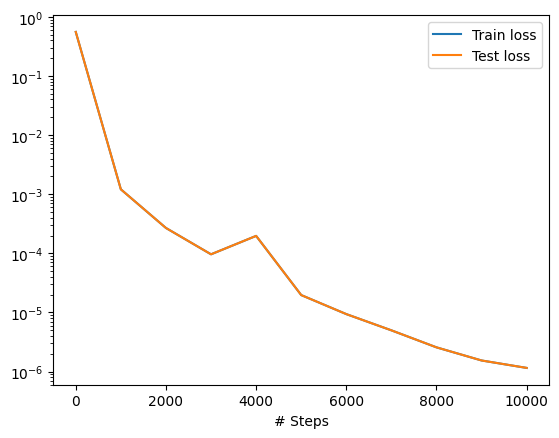

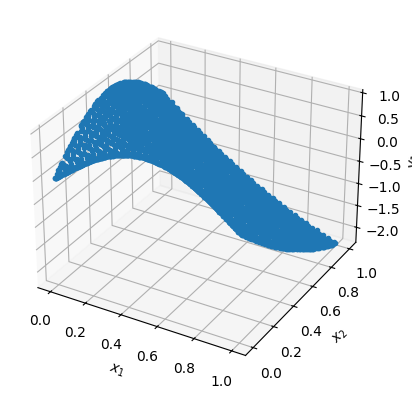

In [ ]:
#PINN structure
data=dde.data.TimePDE(
    geotim,
    pde,
    [ic],
    num_domain=2000,
    num_boundary=200,
    num_initial=200)

layer=[2]+[32]*3+[1]
net=dde.maps.FNN(layer,"tanh","Glorot uniform")
model=dde.Model(data,net)
model.compile("adam",lr=0.001)
losshistory,train_state=model.train(iterations=10000)
dde.saveplot(losshistory,train_state,issave=True,isplot=True)


In [56]:
#3D Plot
x=np.linspace(0,1,100)
t=np.linspace(0,1,100)
X,T=np.meshgrid(x,t)
X_flat=X.flatten()[:,None]
T_flat=T.flatten()[:,None]
insert=np.hstack((X_flat, T_flat))
result=model.predict(insert)
U=result.reshape(100,100)

fig=go.Figure(data=[go.Surface(z=U,x=X,y=T, colorscale="Viridis")])
fig.update_layout(title="1D Heat Equation",
                  scene=dict(
                      xaxis_title="x",
                      yaxis_title="t",
                      zaxis_title="u(x,t)"
                  ))
fig.show()